In [1]:
import pandas as pd

In [2]:
user_data = pd.read_csv('3_user_data.csv')
user_data

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [3]:
logs = pd.read_csv('3_logs.csv')
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [4]:
logs.groupby('client', as_index=False) \
    .aggregate({'success': 'sum'}) \
    .sort_values('success', ascending=False)

,client,success
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
...,...,...
2157,54315,0
689,17713,0
3042,76192,0
3041,76172,0


In [5]:
logs.groupby('platform', as_index=False) \
    .aggregate({'success': 'sum'}) \
    .sort_values('success', ascending=False) \
    .head(1)

,platform,success
1,phone,2019


In [6]:
j_df = logs.merge(user_data, how = 'inner', on = 'client')
j_df

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


In [7]:
prem_df = j_df[j_df['premium'] == True]
prem_df

,client,success,platform,time,premium,age
42,35604,False,phone,1585459894,True,65
49,11983,True,phone,1585459511,True,68
52,99308,True,computer,1585409409,True,38
59,49625,False,phone,1585447789,True,65
64,53978,True,computer,1585408637,True,46
...,...,...,...,...,...,...
3376,20278,True,computer,1585456706,True,65
3399,78455,True,phone,1585459854,True,23
3401,57026,True,computer,1585438120,True,62
3418,2864,True,phone,1585459818,True,41


In [8]:
prem_df.groupby('platform', as_index=False) \
    .aggregate({'client': pd.Series.nunique}) \
    .sort_values('client', ascending=False)

,platform,client
1,phone,242
0,computer,145
2,tablet,24


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='age', ylabel='Density'>

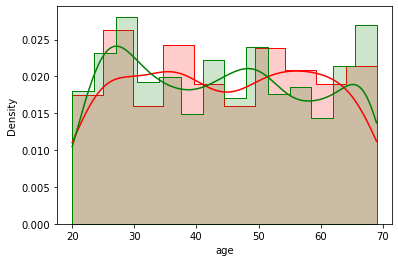

In [10]:
sns.histplot(data=j_df[j_df['premium'] == True], x="age", color='red', kde=True, stat="density", element="step", alpha = 0.2)
sns.histplot(data=j_df[j_df['premium'] == False], x="age",  color='green',kde=True, stat="density", element="step", alpha = 0.2)

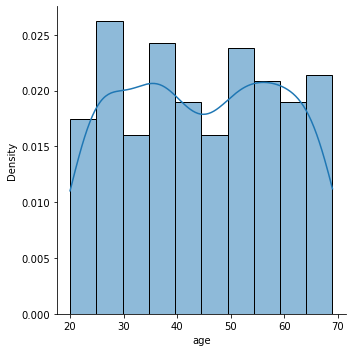

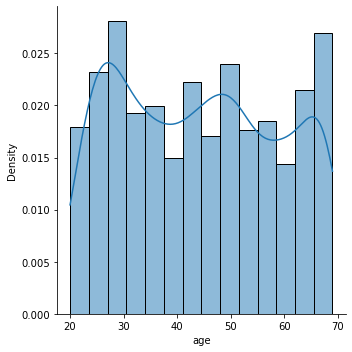

In [11]:
#fig, ax = plt.subplots()
sns.displot(data=j_df[j_df['premium'] == True], x="age",  kde=True, stat="density", kind="hist")
sns.displot(data=j_df[j_df['premium'] == False], x="age", kde=True, stat="density", kind="hist")
plt.show()

In [14]:
j_df2 = j_df.sort_values('success', ascending=False).iloc[1500:,:]
j_df2

,client,success,platform,time,premium,age
618,17355,True,computer,1585447575,False,43
452,59441,True,computer,1585477988,True,60
440,64064,True,phone,1585465272,False,49
441,64064,True,phone,1585434866,False,49
442,64064,True,phone,1585403209,False,49
...,...,...,...,...,...,...
540,45135,False,phone,1585403577,True,59
1067,92218,False,phone,1585435245,False,37
2652,35317,False,phone,1585415887,False,41
2653,25768,False,tablet,1585408493,False,46


<AxesSubplot:xlabel='age', ylabel='Density'>

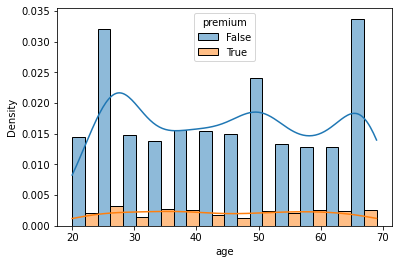

In [15]:
sns.histplot(data=j_df2, x="age", hue="premium", kde=True, stat="density", multiple="dodge")

In [16]:
j_df.success.value_counts()

True     2547
False     892
Name: success, dtype: int64

In [17]:
u_t = j_df[j_df['premium'] == True]
u_t

,client,success,platform,time,premium,age
42,35604,False,phone,1585459894,True,65
49,11983,True,phone,1585459511,True,68
52,99308,True,computer,1585409409,True,38
59,49625,False,phone,1585447789,True,65
64,53978,True,computer,1585408637,True,46
...,...,...,...,...,...,...
3376,20278,True,computer,1585456706,True,65
3399,78455,True,phone,1585459854,True,23
3401,57026,True,computer,1585438120,True,62
3418,2864,True,phone,1585459818,True,41


In [18]:
u_f = j_df[j_df['premium'] == False]
u_f

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25
...,...,...,...,...,...,...
3434,62438,False,phone,1585479041,False,36
3435,95152,True,computer,1585420263,False,67
3436,64496,False,computer,1585459072,False,66
3437,8967,True,phone,1585465121,False,33


<AxesSubplot:xlabel='age', ylabel='Density'>

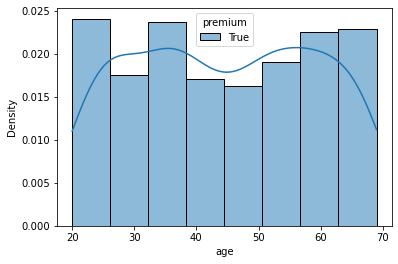

In [19]:
sns.histplot(data=u_t, x="age", hue="premium", kde=True, stat="density", multiple="dodge", bins=8)

<AxesSubplot:xlabel='age', ylabel='Density'>

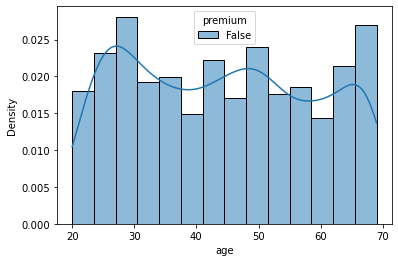

In [20]:
sns.histplot(data=u_f, x="age", hue="premium", kde=True, stat="density", multiple="dodge", bins=14)

In [21]:
succ_op = logs.groupby('client', as_index=False) \
    .aggregate({'success': 'sum'}) \
    .sort_values('success', ascending=False)
succ_op

,client,success
3300,82563,41
1426,36165,41
2095,52870,41
468,12179,41
2469,61473,41
...,...,...
2157,54315,0
689,17713,0
3042,76192,0
3041,76172,0


<AxesSubplot:xlabel='success', ylabel='Count'>

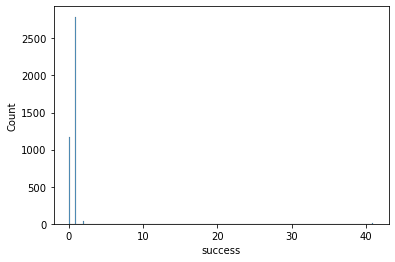

In [22]:
sns.histplot(data=succ_op, x="success")

In [23]:
succ_op.success.value_counts()

1     2791
0     1166
2       43
41       9
40       1
3        1
Name: success, dtype: int64

In [24]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [25]:
star = logs[(logs['platform'] == 'computer') & logs['success']]

In [26]:
star

,client,success,platform,time
4,10931,True,computer,1585468629
7,32167,True,computer,1585457972
9,71087,True,computer,1585458446
11,502,True,computer,1585476186
13,51575,True,computer,1585409788
...,...,...,...,...
4487,68031,True,computer,1585464203
4489,85769,True,computer,1585447052
4491,81031,True,computer,1585401631
4493,92584,True,computer,1585408896


In [31]:
star_join = star.merge(user_data, how = 'inner', on = 'client')
star_join

,client,success,platform,time,premium,age
0,10931,True,computer,1585468629,False,28
1,32167,True,computer,1585457972,False,42
2,71087,True,computer,1585458446,False,36
3,39975,True,computer,1585428343,False,69
4,99308,True,computer,1585409409,True,38
...,...,...,...,...,...,...
838,4293,True,computer,1585403129,False,29
839,16540,True,computer,1585456144,False,49
840,85769,True,computer,1585447052,False,46
841,81031,True,computer,1585401631,False,45


<AxesSubplot:xlabel='age', ylabel='count'>

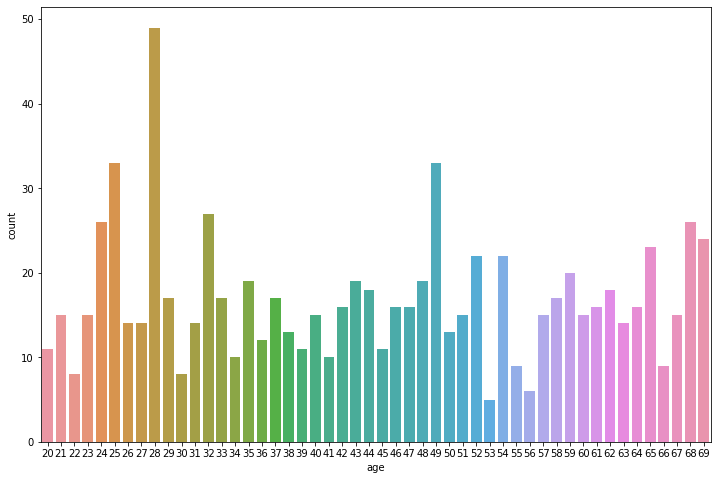

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(data = star_join, x = 'age')